# Machine Learning and visualization with the Fasion-MNIST dataset

### Imports
First we import all packages used in this assignment

In [31]:
from fashionmnistmaster.utils import mnist_reader
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import time
import pandas as pd

## Part 1. Machine Learning

### 1. Loading the data
For loading the data, I've downloaded the GitHub repository from https://github.com/zalandoresearch/fashion-mnist. This repository contains the data and a tool for reading the data (the mnist_reader).

The data is already split into a train and a test set by default. The training set contains 60.000 samples and the test set contains 10.000 samples.

In [20]:
X_train, y_train = mnist_reader.load_mnist('fashionmnistmaster/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashionmnistmaster/data/fashion', kind='t10k')
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


## Random Forest Classifier

### 2. Training on the full training set and time how long it takes

In [35]:
start_time = time.time()

classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 7.231917142868042 seconds ---


### 2. Validating the model

In [22]:
classifier.score(X_test, y_test)

0.8529

### 3. Reducing the dimensions using PCA

The assignment asked for an explained_variance_ratio of 95%, which is achievable by just adding 0.95 to the constructor. As printed below the code, this reduces the amount of dimensions to 187.

In [37]:
start_time = time.time()
pca = PCA(.95).fit(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape, X_test_pca.shape)
print(pca.explained_variance_ratio_.sum())

--- 6.429630279541016 seconds ---
(60000, 187) (10000, 187)
0.9500039103537348


### 4. Training on the dataset with reduced dimensions

In [38]:
start_time = time.time()

classifierRD = RandomForestClassifier(n_estimators=10, random_state=0)
classifierRD.fit(X_train_pca, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 8.850399732589722 seconds ---


As we can see it didn't reduce the training time at all, instead, it actually increased training time.

### 4. Evaluating the model trained with reduced dimensions

In [39]:
classifierRD.score(X_test_pca, y_test)

0.8138

### 5 + 6. Comparison of using the full dataset vs the dataset with reduced dimensions

We can conclude that it's actually slower to train the RandomForestClassifier on the dataset with reduced dimensions vs the full dataset. This also leads to a lower accuracy as well. However, this doesn't have to apply for other algorithms aswell, as we may find out using Softmax Regression in the next chapter.

## Softmax Regression

The Softmax Regression algorithm we will use is the Scikit-learn LogisticRegression model with the multiclass property set to true. We will use this model on both the original dataset and the dataset with reduced dimensions. After doing so we will compare the speed and scores of both models.

### 7. The original dataset

First we will train a Softmax Regression model on the original dataset and time how long it takes to learn it. 

In [44]:
start_time = time.time()

softmaxRegression = LogisticRegression(random_state=0, solver='lbfgs',
                                      multi_class='multinomial').fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

softmaxRegression.score(X_test, y_test)

--- 11.400398015975952 seconds ---


C:\Users\Rikva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8412

### 8. The dataset with reduced dimensions

Now we will train a Softmax Regression model on the dataset with reduced dimensions.

In [45]:
start_time = time.time()

softmaxRegression = LogisticRegression(random_state=0, solver='lbfgs',
                                      multi_class='multinomial').fit(X_train_pca, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

softmaxRegression.score(X_test_pca, y_test)

--- 4.5314929485321045 seconds ---


C:\Users\Rikva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8425

### 9. Conclusions

When using Softmax Regression, the dimension reduction of PCA seems to have a positive effect. This more than halved the training speed and increased the accuracy by a minimal amount. 

My conclusion here is that dimension reduction is worth trying out, but doesn't nessecarily have to give a positive effect on your training speed and accuracy.

## Part 2. Visualization

### 1. Reducing to a 2 dimensional dataset using t-SNE

We have to use dimensionality on a subset of 12.500 images, therefore we split the training set into 2 sets using sklearn's test_train_split library.

In [28]:
# Subset 2 is the subset with 12.500 images (12.500 is 20,833% of 60.000)
SubsetX_1, SubsetX_2, SubsetY_1, SubsetY_2 = train_test_split(
    X_train, y_train, test_size=0.20833, random_state=5)

SubsetX_2_tSNE = TSNE(n_components=2).fit_transform(SubsetX_2)
SubsetX_2_tSNE.shape

(12500, 2)

### Plotting a scatterplot with different colors for each class

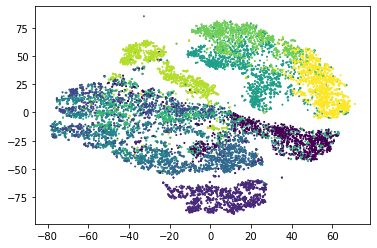

In [29]:
pyplot.scatter(SubsetX_2_tSNE[:,0], SubsetX_2_tSNE[:,1], s=1, c=SubsetY_2)
pyplot.show()

In the plot above we can see that some of the data is nicely spread, but there are also quite alot of overlapping labels. In the next plot we will check the same, but then with only 3 labels of the dataset.

### Creating a subset of 3 labels: Sneaker, Bag, T-Shirt

As documented in the zalando git repository, sneaker has the label value 7, bag has the label value 8 and t-shirt has the label value 0.

First we merge the data and the labels together into a dataframe. Doing so makes it easier to filter on the specific labels using the dataframe.loc function.

In [32]:
df = pd.DataFrame(SubsetX_2_tSNE, SubsetY_2)
df2 = df.loc[[0, 7, 8]]

After filtering the data on the three specific labels, we plot another scatterplot on this data.

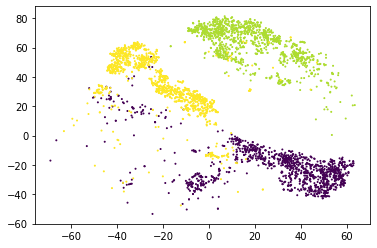

In [33]:
pyplot.scatter(df2[0], df2[1], c=df2.index, s=1)
pyplot.show()

The plot above shows better separated clusters, which we could have expected since there are fewer different labels in this plot.